In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#(https://www.kaggle.com/datasets/vitthalmadane/energy-consumption-time-series-dataset/data)
dfs = []
for i in range(1,4):
    df = pd.read_csv(f'KwhConsumptionBlower78_{i}.csv')
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3606 non-null   int64  
 1   TxnDate      3606 non-null   object 
 2   TxnTime      3606 non-null   object 
 3   Consumption  3606 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 112.8+ KB


In [18]:
df = df.drop(['Unnamed: 0', 'TxnTime'], axis=1)
df['TxnDate'] = pd.to_datetime(df['TxnDate'])
df = df.set_index('TxnDate').sort_index()
df = df.resample('1D').sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2022-01-01 to 2022-02-28
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


### seasonal_decompose approach- (additive/multiplicative)

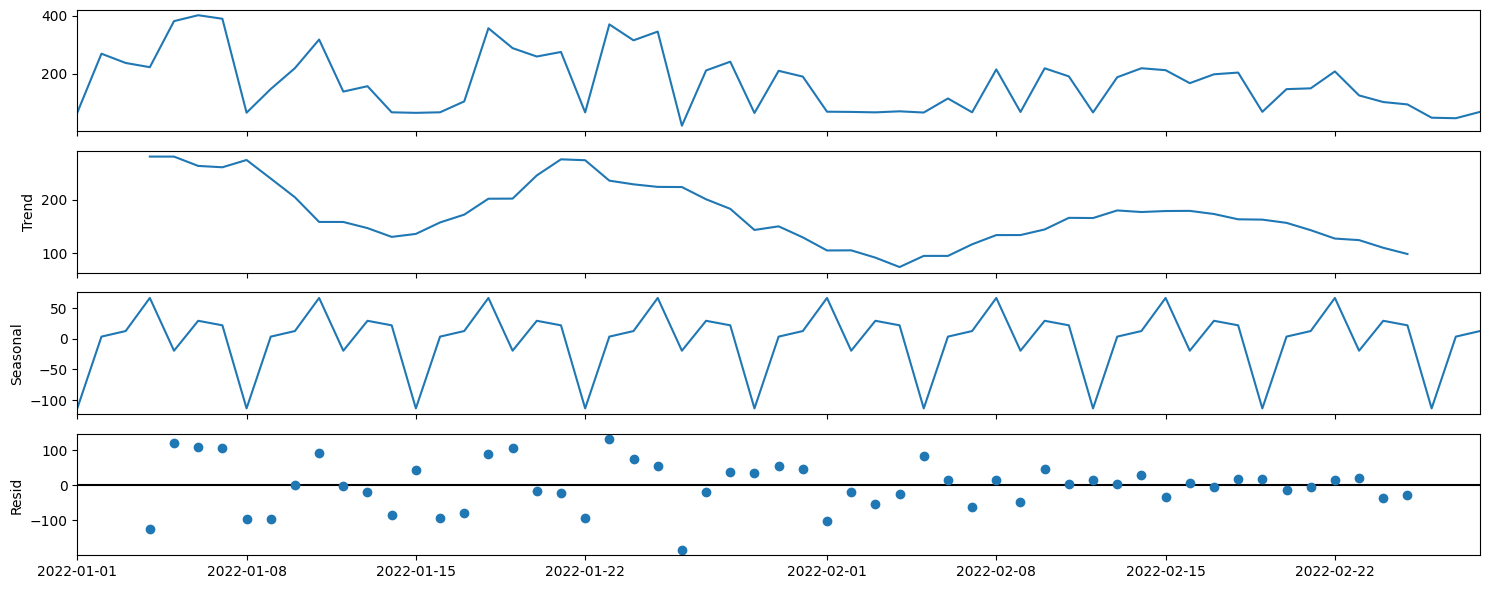

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom = seasonal_decompose(df,model='additive', period=7)
decom_df = pd.DataFrame({'y':df['Consumption'], 'trend':decom.trend, 'seasonality':decom.seasonal, 'residual':decom.resid})
decom_df['day'] =decom_df.index.strftime('%a')
plt.rc("figure", figsize=(15,6))
decom.plot()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2022-01-01 to 2022-02-28
Freq: D
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  59 non-null     float64
dtypes: float64(1)
memory usage: 944.0 bytes


In [41]:
decom_df.head(10)

,y,trend,seasonality,residual,day
TxnDate,,,,,
2022-01-01,65.462,NaN,-113.214501,NaN,Sat
2022-01-02,268.450,NaN,3.354723,NaN,Sun
2022-01-03,236.566,NaN,12.417866,NaN,Mon
2022-01-04,222.020,280.407714,66.178014,-124.565728,Tue
2022-01-05,380.630,280.376571,-19.521808,119.775236,Wed
2022-01-06,400.964,263.005143,29.067764,108.891093,Thu
2022-01-07,388.762,260.458571,21.717942,106.585486,Fri
2022-01-08,65.244,274.057143,-113.214501,-95.598641,Sat
2022-01-09,146.850,239.383714,3.354723,-95.888437,Sun


In [71]:
decom_df2 = decom_df.iloc[1:8,1:6] 

In [72]:
decom_df2

,trend,seasonality,residual,day
TxnDate,,,,
2022-01-02,NaN,3.354723,NaN,Sun
2022-01-03,NaN,12.417866,NaN,Mon
2022-01-04,280.407714,66.178014,-124.565728,Tue
2022-01-05,280.376571,-19.521808,119.775236,Wed
2022-01-06,263.005143,29.067764,108.891093,Thu
2022-01-07,260.458571,21.717942,106.585486,Fri
2022-01-08,274.057143,-113.214501,-95.598641,Sat


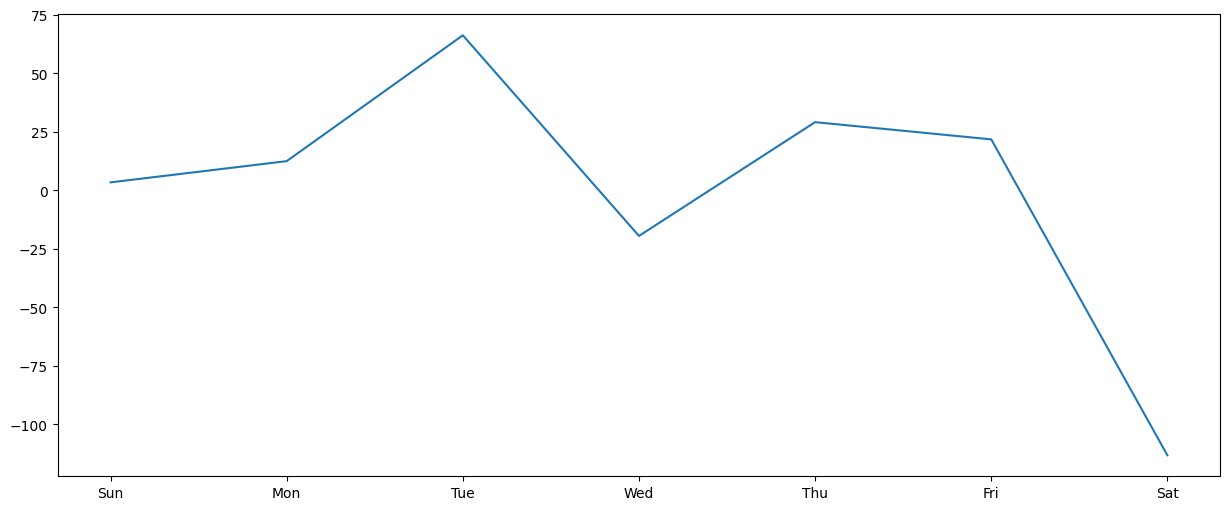

In [73]:
plt.plot(decom_df2['day'], decom_df2['seasonality'])
plt.show()

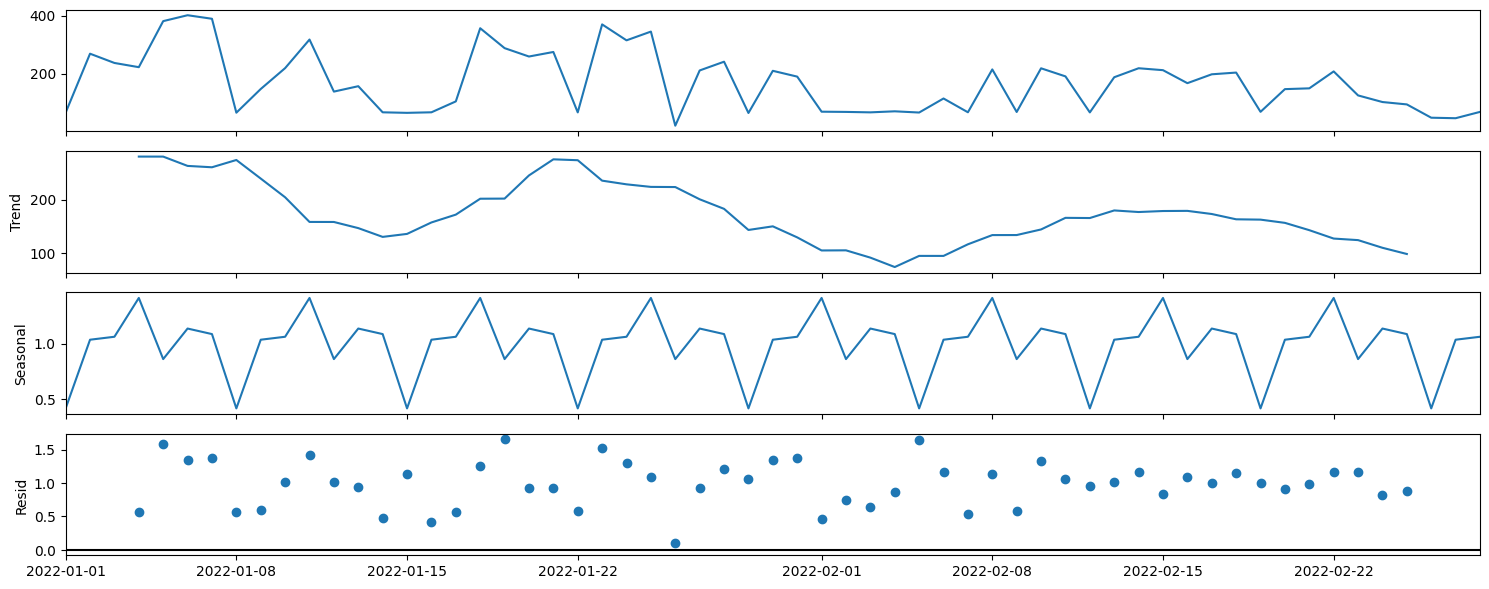

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decom = seasonal_decompose(df,model='multiplicative', period=7)
decom_df = pd.DataFrame({'y':df['Consumption'], 'trend':decom.trend, 'seasonality':decom.seasonal, 'residual':decom.resid})
decom_df['day'] =decom_df.index.strftime('%a')
plt.rc("figure", figsize=(15,6))
decom.plot()
plt.show()

In [75]:
decom_df.head(10)

,y,trend,seasonality,residual,day
TxnDate,,,,,
2022-01-01,65.462,NaN,0.419968,NaN,Sat
2022-01-02,268.450,NaN,1.033855,NaN,Sun
2022-01-03,236.566,NaN,1.060286,NaN,Mon
2022-01-04,222.020,280.407714,1.407243,0.562643,Tue
2022-01-05,380.630,280.376571,0.860683,1.577313,Wed
2022-01-06,400.964,263.005143,1.133739,1.344709,Thu
2022-01-07,388.762,260.458571,1.084227,1.376655,Fri
2022-01-08,65.244,274.057143,0.419968,0.566870,Sat
2022-01-09,146.850,239.383714,1.033855,0.593362,Sun


### Decomposition - STL (Seasonal - Trend using LOESS)
#### (Locally weighted error sum of squares)

<Figure size 1500x600 with 0 Axes>

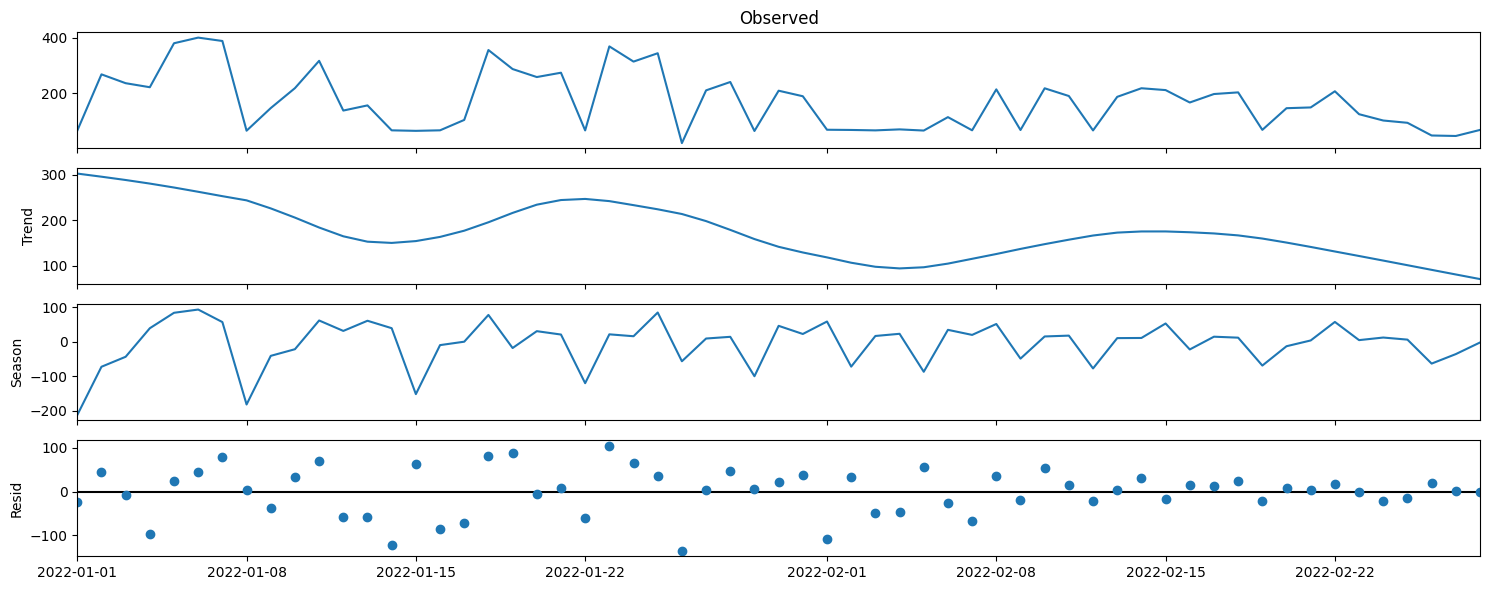

In [82]:
from statsmodels.tsa.seasonal import STL
plt.figure(figsize=(15, 6))
decom2 = STL(df, seasonal=7).fit()
decom2_df = pd.DataFrame({'y':df['Consumption'], 'trend':decom2.trend, 'seasonality':decom2.seasonal, 'residual':decom2.resid})
decom2.plot()
plt.show()

In [83]:
decom2_df.head()

,y,trend,seasonality,residual
TxnDate,,,,
2022-01-01,65.462,302.214300,-212.664274,-24.088026
2022-01-02,268.450,295.348704,-72.332507,45.433803
2022-01-03,236.566,288.097547,-43.297741,-8.233806
2022-01-04,222.020,280.251995,39.707265,-97.939259
2022-01-05,380.630,271.603783,84.576583,24.449634
